# Open Data Analysis
Проанализируем открытый датасет The Nutritional Content of Food (ссылка на скачивание в readme). В дс содержится информация по составу нескольких тысяч продуктов: калорийность, макронутриенты, микронутриенты.

# Датасет
Загрузим датасет в pandas Dataframe. В датасете содержится информация по 8790 продуктам в 54 колонках. Для каждого продукта имеется краткое описание и содержание в нём того или иного нутриента. Единица измерения указана в скобках, например:
 - Water_(g) - количество воды в граммах на 100г продукта;
 - Niacin_(mg) - количество ниацина (никотиновая кислота, витамин PP, одна из форм витамина B3) в миллиграммах на 100г продукта.

Всего описано 10 макронутриентов и 35 микронутриентов.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv('./../data/data.csv')

In [3]:
df.shape

(8790, 54)

In [4]:
df[:5].T

,0,1,2,3,4
index,0,1,2,3,4
NDB_No,1001,1002,1003,1004,1005
Shrt_Desc,"BUTTER,WITH SALT","BUTTER,WHIPPED,W/ SALT","BUTTER OIL,ANHYDROUS","CHEESE,BLUE","CHEESE,BRICK"
Water_(g),15.87,16.72,0.24,42.41,41.11
Energ_Kcal,717,718,876,353,371
Protein_(g),0.85,0.49,0.28,21.4,23.24
Lipid_Tot_(g),81.11,78.3,99.48,28.74,29.68
Ash_(g),2.11,1.62,0.0,5.11,3.18
Carbohydrt_(g),0.06,2.87,0.0,2.34,2.79
Fiber_TD_(g),0.0,0.0,0.0,0.0,0.0


# Подготовка данных

Проведем небольшую подготовку данных:
 - уберём опечатки в названиях колонок;
 - введём несколько констант с названиями нутриентов и пр;
 - уберём nan из дозировок нутриентов: будем считать, что если информации нет, то это нулевое содержание.

In [5]:
# Rename some typos
df.rename(
    columns={
        'Energ_Kcal': 'Energy_(Kcal)',
        'Panto_Acid_mg)': 'Panto_Acid_(mg)',
        'Choline_Tot_ (mg)': 'Choline_Tot_(mg)',
        'Copper_mg)': 'Copper_(mg)',
        'Vit_A_IU': 'Vit_A_(IU)',
        'Vit_A_RAE': 'Vit_A_(RAE)',
        'Lut+Zea_ (µg)': 'Lut+Zea_(µg)',
        'Vit_D_µg': 'Vit_D_(µg)',
        'Vit_D_IU': 'Vit_D_(IU)'
    },
    inplace=True
)

In [6]:
# Add some constants
MACROS = [
	'Water_(g)',
	'Protein_(g)',
	'Lipid_Tot_(g)',
	'Ash_(g)',
	'Carbohydrt_(g)',
	'Fiber_TD_(g)',
	'Sugar_Tot_(g)',
	'FA_Sat_(g)',
	'FA_Mono_(g)',
	'FA_Poly_(g)',
]
MICROS = [
    'Calcium_(mg)',
	'Iron_(mg)',
	'Magnesium_(mg)',
	'Phosphorus_(mg)',
	'Potassium_(mg)',
	'Sodium_(mg)',
	'Zinc_(mg)',
	'Copper_(mg)',
	'Manganese_(mg)',
	'Selenium_(µg)',
	'Vit_C_(mg)',
	'Thiamin_(mg)',
	'Riboflavin_(mg)',
	'Niacin_(mg)',
	'Panto_Acid_(mg)',
	'Vit_B6_(mg)',
	'Folate_Tot_(µg)',
	'Folic_Acid_(µg)',
	'Food_Folate_(µg)',
	'Folate_DFE_(µg)',
	'Choline_Tot_(mg)',
	'Vit_B12_(µg)',
	'Vit_A_(IU)',
	'Vit_A_(RAE)',
	'Retinol_(µg)',
	'Alpha_Carot_(µg)',
	'Beta_Carot_(µg)',
	'Beta_Crypt_(µg)',
	'Lycopene_(µg)',
	'Lut+Zea_(µg)',
	'Vit_E_(mg)',
	'Vit_D_(µg)',
	'Vit_D_(IU)',
	'Vit_K_(µg)',
	'Cholestrl_(mg)',
]
NUTRIENTS = MACROS + MICROS
ENERGY_KCAL = 'Energy_(Kcal)'
DESCRIPTION = 'Shrt_Desc'
PROTEIN, FAT, CARBS = 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)'

In [7]:
print(f'Micronutrients: {len(MICROS)}, macronutrients: {len(MACROS)}, total: {len(NUTRIENTS)}')

Micronutrients: 35, macronutrients: 10, total: 45


In [8]:
# Fill NA with zeros
df[NUTRIENTS] = df[NUTRIENTS].fillna(0.0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             8790 non-null   int64  
 1   NDB_No            8790 non-null   int64  
 2   Shrt_Desc         8790 non-null   object 
 3   Water_(g)         8790 non-null   float64
 4   Energy_(Kcal)     8790 non-null   int64  
 5   Protein_(g)       8790 non-null   float64
 6   Lipid_Tot_(g)     8790 non-null   float64
 7   Ash_(g)           8790 non-null   float64
 8   Carbohydrt_(g)    8790 non-null   float64
 9   Fiber_TD_(g)      8790 non-null   float64
 10  Sugar_Tot_(g)     8790 non-null   float64
 11  Calcium_(mg)      8790 non-null   float64
 12  Iron_(mg)         8790 non-null   float64
 13  Magnesium_(mg)    8790 non-null   float64
 14  Phosphorus_(mg)   8790 non-null   float64
 15  Potassium_(mg)    8790 non-null   float64
 16  Sodium_(mg)       8790 non-null   float64


# Вспомогательное

In [10]:
def calories_macros_plots(food, label):
    fig, (ax_0, ax_1) = plt.subplots(1, 2)
    fig.set_figwidth(12)
    
    ax_0.hist(food[ENERGY_KCAL], bins=30, alpha=0.5);
    ax_0.set(
        title=f'{label}, calories',
        xlabel='KCal',
        ylabel='N',
    )
    
    ax_1.hist(food[PROTEIN], alpha=.4, label='Protein')
    ax_1.hist(food[FAT], alpha=.4, label='Fat')
    ax_1.hist(food[CARBS], alpha=.4, label='Carbs')
    ax_1.set(
        title=f'{label}, macronutrients',
        xlabel='Grams per 100 g portion',
        ylabel='N',
        xlim=(0, 100)
    )
    ax_1.legend();

# Анализ

## Самые калорийные продукты

Посмотрим на описательную статистику по показателю калорийности. Примерно четверть продуктов имеет калорийность до 100 ккал, 75% продуктов имееют калорийность до 337 ккал,в районе 800 ккал имеется провал, а потом всплеск. Самыми калорийными являются концентриованные жиры: сало и масла. В раоне 600 ккал самые калорийные: орехи, семена и их производные, темный шоколад с большим содержанием какао-масел и жирные куски туши. 500 ккал - масло и печенье (предположительно с большим количеством масла в составе и/или калорийной начинкой).

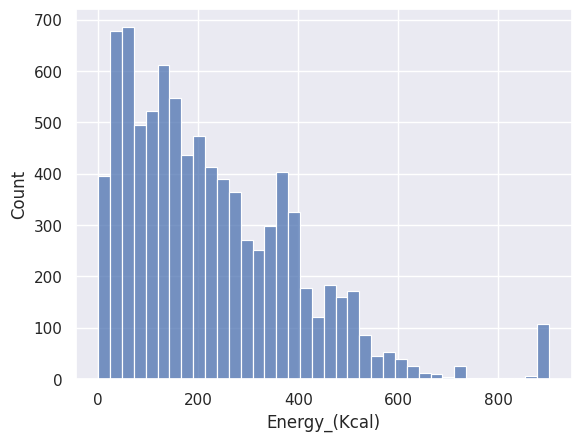

In [11]:
sns.histplot(df[ENERGY_KCAL]);

In [12]:
df[ENERGY_KCAL].describe()

count    8790.000000
mean      226.317634
std       169.877539
min         0.000000
25%        91.000000
50%       191.000000
75%       337.000000
max       902.000000
Name: Energy_(Kcal), dtype: float64

In [13]:
df.nlargest(20, columns=ENERGY_KCAL)[[DESCRIPTION, ENERGY_KCAL]]

,Shrt_Desc,Energy_(Kcal)
633,"FAT,BEEF TALLOW",902
634,LARD,902
687,"FAT,MUTTON TALLOW",902
724,"FISH OIL,COD LIVER",902
725,"FISH OIL,HERRING",902
726,"FISH OIL,MENHADEN",902
727,"FISH OIL,MENHADEN,FULLY HYDR",902
728,"FISH OIL,SALMON",902
729,"FISH OIL,SARDINE",902
686,"OIL,CORN,INDUSTRIAL & RTL,ALLPURP SALAD OR COO...",900


In [14]:
df[df[ENERGY_KCAL] < 600].nlargest(20, columns=ENERGY_KCAL)[[DESCRIPTION, ENERGY_KCAL]]

,Shrt_Desc,Energy_(Kcal)
4826,"PEANUTS,ALL TYPES,OIL-ROASTED,W/SALT",599
4996,"PEANUTS,ALL TYPES,OIL-ROASTED,WO/ SALT",599
3636,"ALMONDS,DRY RSTD,WO/SALT",598
3723,"ALMONDS,DRY RSTD,W/SALT",598
4835,"PEANUT BUTTER,SMOOTH STYLE,W/ SALT",598
5002,"PEANUT BUTTER,SMOOTH STYLE,WO/SALT",598
6452,"CHOCOLATE,DK,70-85% CACAO SOL",598
5451,"LAMB,NZ,IMP,INTERMUSCULAR FAT,CKD",596
7378,"BEEF,AUS,IMP,WAGYU,EXTERNAL FAT,AUST. MARBLE S...",596
3695,"SESAME BUTTER,TAHINI,FROM RSTD&TSTD KRNLS (MOS...",595


In [15]:
df[df[ENERGY_KCAL] < 500].nlargest(20, columns=ENERGY_KCAL)[[DESCRIPTION, ENERGY_KCAL]]

,Shrt_Desc,Energy_(Kcal)
732,"BUTTER,LT,STK,W/SALT",499
733,"BUTTER,LT,STK,WO/SALT",499
6054,"SNACKS,CORN-BASED,EXTRUDED,ONION-FLAVOR",499
7858,"KEEBLER,CHS ON WHEAT SNDWCH CRACKERS",499
7885,"KEEBLER,FUDGE SHOPPE,COCNT DREAMS COOKIES",499
7898,"KEEBLER,FUDGE SHOPPE,GRASSHOPPER COOKIES,FUDGE...",499
8168,"SAGE VALLEY,GLUTEN FREE VANILLA SNDWCH COOKIES",499
6385,TARO CHIPS,498
6418,"SNACKS,TORTILLA CHIPS,NACHO-FLAVOR,MADE W/ENR ...",498
7844,"GIRL SCOUTS,TREFOILS COOKIES",498


## Некоторые группы продуктов

В датасете, к сожалению, нет колонки, которая описывала бы категорию продуктов, только конкретные названия. Поэтому попытаемся сделать импровизированную категоризацию по ключевым словам: `pd.Series.str.contains`

Сделаем три выборки: по шоколаду (строка `CHOCO`), по продуктам из говядины (строка `BEEF`) и по сельдерею (строка `CELERY`). Посмотрим на соотношения нутриентов в разных группах.

Шоколад. В этой категории, как правило, присутсвуют высококалорийные продукты - 400+ ккал, но есть и экземпляры до 100 ккал, поскольку содержание шоколада может быть минимальным. По нутриентам в основном 50+г углеводов, 20-40г жира, минимум протеина.

Говядина. Продукты из говядины в основном имеют калорийность до 400 ккал, основные нутриенты - белок и жир (до 40%), углеводов минимум.

Сельдерей. Большинсво продуктов, содержащих сельдерей, укладываются в 100 ккал, основной нутриент - углеводы.

In [16]:
choco = df[df[DESCRIPTION].str.contains('CHOCO')]
beef = df[df[DESCRIPTION].str.contains('BEEF')]
celery = df[df[DESCRIPTION].str.contains('CELERY')]

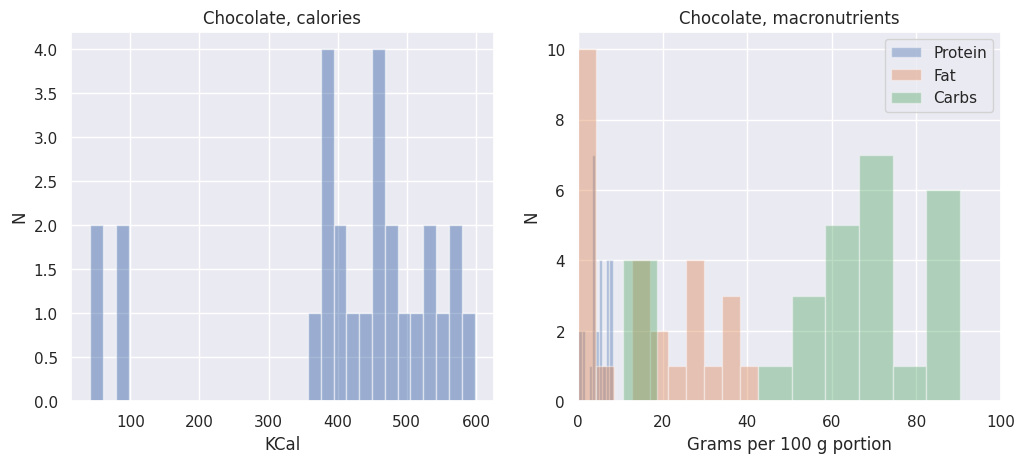

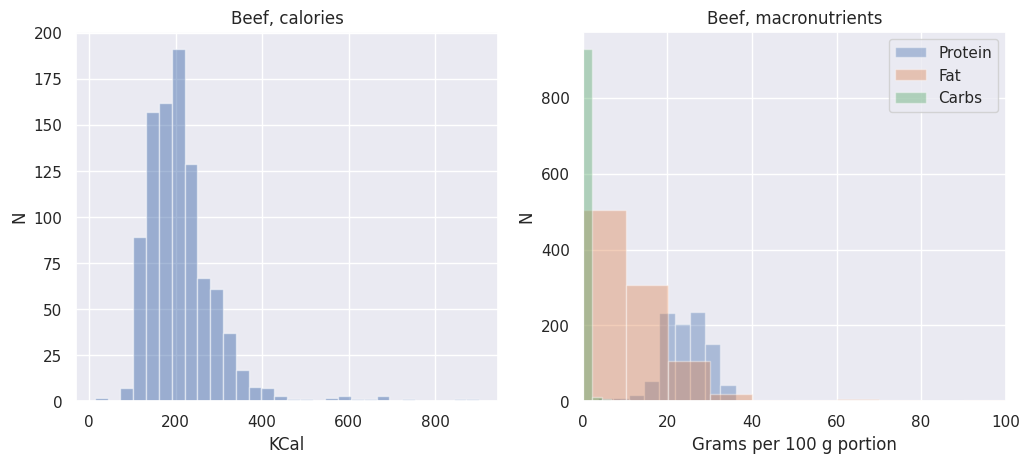

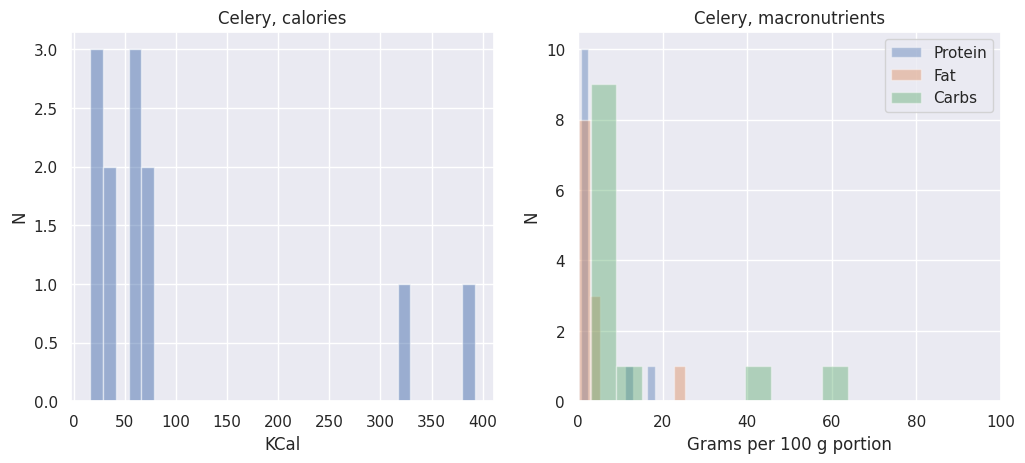

In [17]:
calories_macros_plots(choco, 'Chocolate')
calories_macros_plots(beef, 'Beef')
calories_macros_plots(celery, 'Celery')

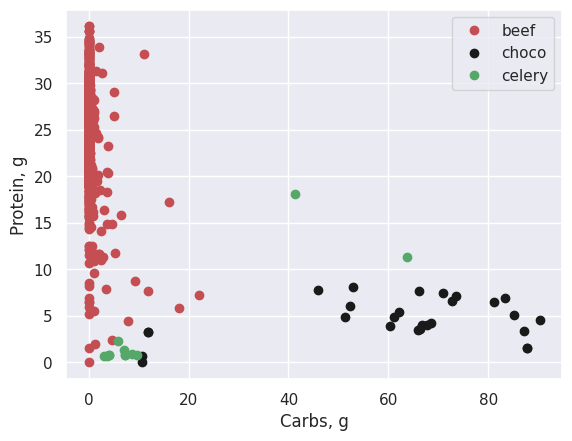

In [18]:
plt.plot(beef[CARBS], beef[PROTEIN], 'or', label='beef')
plt.plot(choco[CARBS], choco[PROTEIN], 'ok', label='choco')
plt.plot(celery[CARBS], celery[PROTEIN], 'og', label='celery')

plt.xlabel('Carbs, g')
plt.ylabel('Protein, g')

plt.legend();

Сделаем ещё две выборки: по печени (строка `LIVER`) и по печенью (строка `COOKIE`). Посмотрим на соотношения нутриентов в разных группах.

Печень. Большая часть продуктов - до 350 ккал, углеводов - до 10%, жир и протеин - до 30%.

Печенье. Большая часть продуктов - от 350 ккал, углеводов - максимум (от 50 до 80%), жира - до 40%, протеина - до 10%.

In [19]:
liver = df[df[DESCRIPTION].str.contains('LIVER')]
cookies = df[df[DESCRIPTION].str.contains('COOKIE')]

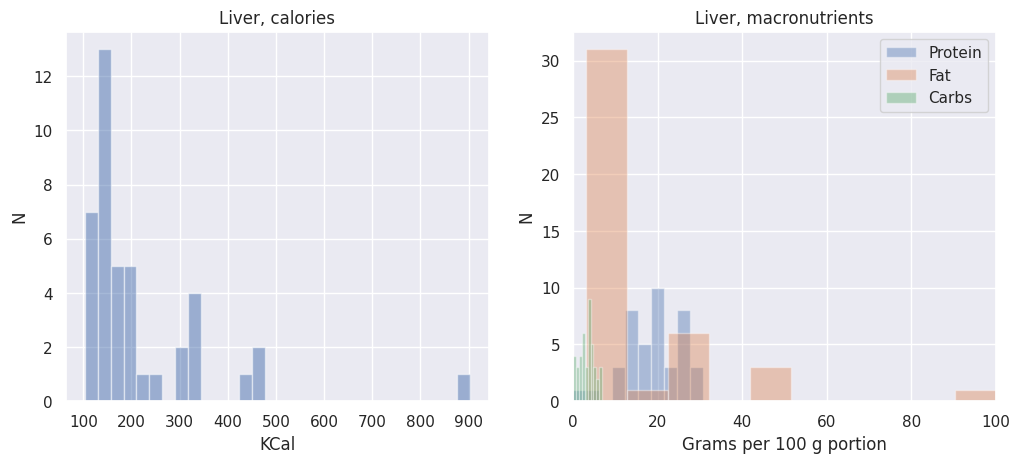

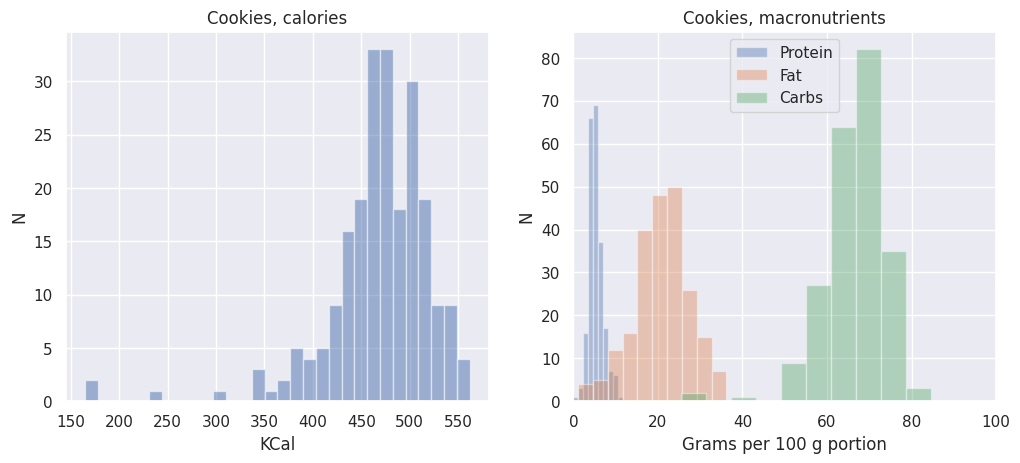

In [20]:
calories_macros_plots(liver, 'Liver')
calories_macros_plots(cookies, 'Cookies')

Также можно обратить внимание на различие микронутриентов. Продукты из печени содержат большое количество витамина A, коим печенье бедно

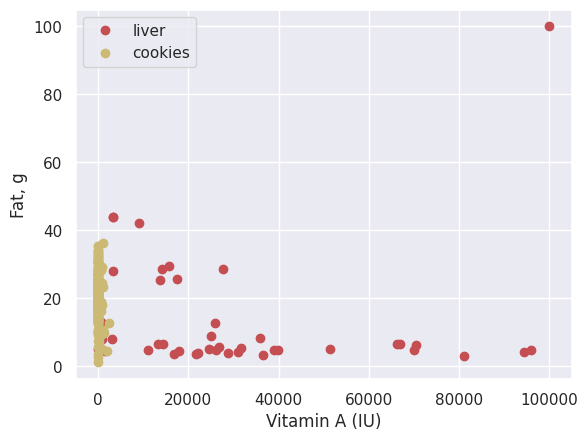

In [21]:
plt.plot(liver['Vit_A_(IU)'], liver[FAT], 'or', label='liver')
plt.plot(cookies['Vit_A_(IU)'], cookies[FAT], 'oy', label='cookies')

plt.xlabel('Vitamin A (IU)')
plt.ylabel('Fat, g')

plt.legend();

## Топ по нутриентам

Рассмотрим продукты, которые занимают первые места по содержанию того или иного нутиента. Так, самые богатые белком продукты - это, как правило, концентрированные сушеные продукты: изолят сои, желатин, сушеный яичный белок, сушеное мясо. Составим общую таблицу, которая содержит топ 3 продукта по каждому нутриенту. Так, лидеры по полиненасыщенным жирам - это растительные масла сафлора, косточки винограда и льна, по цинку - устрицы, по пищевым волокнам - кукурузная клетчатка и сушеные грибы.

In [22]:
df.nlargest(10, columns=PROTEIN)[[DESCRIPTION, ENERGY_KCAL, PROTEIN]]

,Shrt_Desc,Energy_(Kcal),Protein_(g)
4858,SOY PROTEIN ISOLATE,335,88.32
5009,"SOY PROT ISOLATE,K TYPE",321,88.32
6204,"GELATINS,DRY PDR,UNSWTND",335,85.60
216,"EGG,WHITE,DRIED,STABILIZED,GLUCOSE RED",357,84.08
8327,"SEAL,BEARDED (OOGRUK),MEAT,DRIED (ALASKA NATIVE)",351,82.60
124,"EGG,WHITE,DRIED,PDR,STABILIZED,GLUCOSE RED",376,82.40
151,"EGG,WHITE,DRIED",382,81.10
4171,"BEVERAGES,PROT PDR WHEY BSD",352,78.13
8409,"STEELHEAD TROUT,DRIED,FLESH (SHOSHONE BANNOCK)",382,77.27
123,"EGG,WHITE,DRIED,FLAKES,STABILIZED,GLUCOSE RED",351,76.92


In [23]:
TOP_N = 3

pd.concat([
    df
    .nlargest(TOP_N, columns=nutrient)[DESCRIPTION]
    .set_axis([f'top_{n + 1}' for n in range(TOP_N)])
    .rename(nutrient)
    for nutrient in NUTRIENTS
], axis=1).T

,top_1,top_2,top_3
Water_(g),"BEVERAGES,ICELANDIC,GLACIAL NAT SPRING H2O","BEVERAGES,H2O,BTLD,POLAND SPRING","BEVERAGES,H2O,BTLD,NON-CARBONATED,CALISTOGA"
Protein_(g),SOY PROTEIN ISOLATE,"SOY PROT ISOLATE,K TYPE","GELATINS,DRY PDR,UNSWTND"
Lipid_Tot_(g),"FAT,BEEF TALLOW",LARD,"SHORTENING,HOUSEHOLD,PARTIALLY HYDROG SOYBN -C..."
Ash_(g),"SALT,TABLE","SEASONING MIX,DRY,SAZON,CORIANDER & ANNATTO","DESSERTS,RENNIN,TABLETS,UNSWTND"
Carbohydrt_(g),"SWEETENER,HERBAL EXTRACT PDR FROM STEVIA LEAF","SWEETENERS,TABLETOP,FRUCTOSE,DRY,PDR","SUGARS,GRANULATED"
Fiber_TD_(g),"CORN BRAN,CRUDE","GUMS,SD GUMS (INCL LOCUST BEAN,GUAR)","FUNGI,CLOUD EARS,DRIED"
Sugar_Tot_(g),"SUGARS,GRANULATED","SUGAR,TURBINADO","SUGARS,POWDERED"
FA_Sat_(g),"FISH OIL,MENHADEN,FULLY HYDR","OIL,INDUSTRIAL,SOY,FULLY HYDR","OIL,INDUSTRIAL,PALM KERNEL (HYDROGENATED),CONF..."
FA_Mono_(g),"OIL,SUNFLOWER,HI OLEIC (70% & OVER)","OIL,HAZELNUT","OIL,SAFFLOWER,SALAD OR COOKING,HI OLEIC"
FA_Poly_(g),"OIL,SAFFLOWER,SALAD OR COOKING,LINOLEIC,(OVER ...","OIL,GRAPESEED","OIL,FLAXSEED,COLD PRESSED"


## Супер фуды

Попытаемся найти те продукты, которые занимают лидерские места сразу по нескольким категориям (только микронутриенты) - не меньше топ 10. Таких продуктов 238 шт. Отсортируем их по следующим критериям:
 - количество топов по нутриентам, в которые попал продукт;
 - самое высокое место по всем топам;
 - сумма всех мест в топе (чем меньше, тем лучше, самый лучший продукт - тот, кто занял первое место по всем нутриентам).

Победителями по этим критериями стали пшеничные хлопья с клетчаткой, дрожжи, печень трески, говяжья печень, перец и базилик (специи), сушеная морковка и прочее.

In [24]:
RANKS = []
superfoods = df.copy()
for n in MICROS:
    col_name = f'{n}_rank'
    RANKS.append(col_name)
    superfoods[col_name] = (
        superfoods[n]
        .rank(method='dense', ascending=False)
        .where(lambda s: s <= 10, np.nan)
    )

In [25]:
superfoods.dropna(subset=RANKS, how='all', inplace=True)

In [26]:
superfoods.shape

(238, 89)

In [27]:
superfoods['n_wins'] = superfoods[RANKS][:].count(axis=1)
superfoods['best_rank'] = superfoods[RANKS].min(axis=1)
superfoods['sum_rank'] = superfoods[RANKS].sum(axis=1)

In [28]:
superfoods.sort_values(
    by=['best_rank', 'n_wins', 'sum_rank'],
    ascending=[True, False, True],
    inplace=True
)

In [29]:
superfoods[[DESCRIPTION, ENERGY_KCAL, 'n_wins', 'best_rank', 'sum_rank']][:20]

,Shrt_Desc,Energy_(Kcal),n_wins,best_rank,sum_rank
1790,"CEREALS RTE,KELLOGG,KELLOGG'S ALL-BRAN COMPLET...",327,10,1.0,58.0
8734,YEAST EXTRACT SPREAD,185,7,1.0,8.0
724,"FISH OIL,COD LIVER",902,5,1.0,5.0
7502,"BEEF,NZ,IMP,VAR MEATS & BY-PRODUCTS LIVER,CKD,BLD",150,5,1.0,18.0
5860,"LEAVENING AGENTS,YEAST,BAKER'S,ACTIVE DRY",325,5,1.0,20.0
5302,"VEAL,VAR MEATS&BY-PRODUCTS,LIVER,CKD,PAN-FRIED",193,5,1.0,31.0
3541,"PEPPERS,SWT,RED,FREEZE-DRIED",314,4,1.0,11.0
252,"SPICES,BASIL,DRIED",233,4,1.0,15.0
3314,"CARROT,DEHYDRATED",341,3,1.0,11.0
280,"PEPPER,RED OR CAYENNE",318,3,1.0,12.0


## Плотные супер фуды

Можно пересчитать топ суперфудов с учетом калорий. В таблице выше можно увидеть некоторые продукты с высокой калорийностью: печень трески, хлопья, специи. Так, среди топ 100 суперфудов средняя калорийность 230 ккал, 75 перцентиль - 316 ккал. Будем искать те продукты, которые приносят максимум нутриентов в пересчёте на калорию.

При таком подходе топ 10 заняли продукты с нулевой калорийностью - обогащенные минералами напитки. Посмотрим на все суперфуды с калорийностью более 10 ккал. Здесь лидерами оказались говяжья печень, капуста кале (кейл), тыква, мякоть перца, некоторые грибы и т.д. В этой выборке топ 100 средняя калорийность 46 ккал, 75 перцентиль - 40 ккал.

In [30]:
superfoods[:100][[ENERGY_KCAL, PROTEIN, FAT, CARBS]].describe()

,Energy_(Kcal),Protein_(g),Lipid_Tot_(g),Carbohydrt_(g)
count,100.000000,100.00000,100.00000,100.00000
mean,229.760000,12.61770,8.66670,31.85450
std,175.994784,11.13474,17.47193,31.54285
min,0.000000,0.00000,0.00000,0.00000
25%,93.750000,2.84000,0.43000,4.23000
50%,215.000000,11.40500,4.46000,16.11000
75%,316.500000,20.00000,7.47500,59.13500
max,902.000000,49.10000,100.00000,91.00000


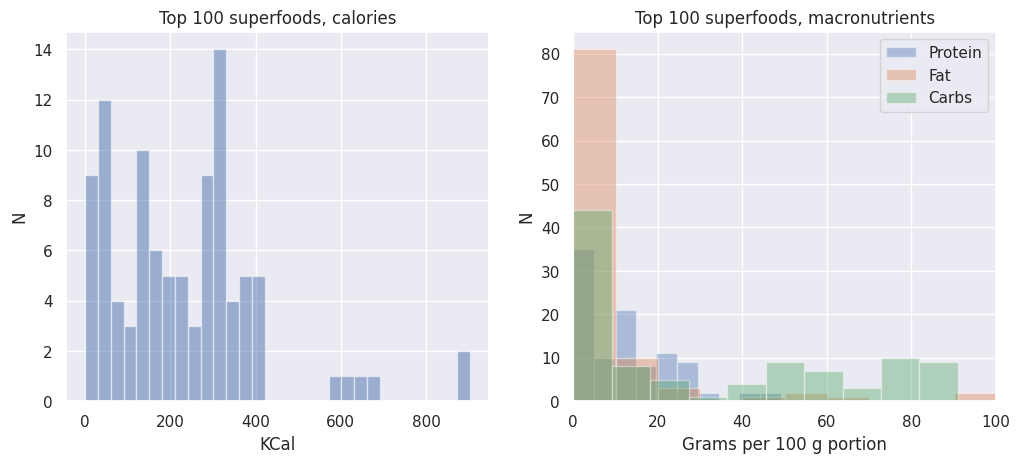

In [31]:
calories_macros_plots(superfoods[:100], 'Top 100 superfoods')

In [32]:
RANKS = []
dense_superfoods = df.copy()
for n in MICROS:
    col_name = f'{n}_per_kcal_rank'
    RANKS.append(col_name)
    dense_superfoods[col_name] = (
        (dense_superfoods[n] / dense_superfoods[ENERGY_KCAL])
        .rank(method='dense', ascending=False)
        .where(lambda s: s <= 10, np.nan)
    )

In [33]:
dense_superfoods = dense_superfoods.dropna(subset=RANKS, how='all').copy()

In [34]:
dense_superfoods['n_wins'] = dense_superfoods[RANKS][:].count(axis=1)
dense_superfoods['best_rank'] = dense_superfoods[RANKS].min(axis=1)
dense_superfoods['sum_rank'] = dense_superfoods[RANKS].sum(axis=1)

In [35]:
dense_superfoods.sort_values(
    by=['best_rank', 'n_wins', 'sum_rank'],
    ascending=[True, False, True],
    inplace=True
)

In [36]:
dense_superfoods[[DESCRIPTION, ENERGY_KCAL, 'n_wins', 'best_rank', 'sum_rank']][:10]

,Shrt_Desc,Energy_(Kcal),n_wins,best_rank,sum_rank
4270,"BEVERAGES,COFFEE,BREWED,PREP W/ TAP H2O,DECAFF...",0,14,1.0,14.0
4435,"BEVERAGES,POWERADE ZERO ION4,CALORIE-FREE,ASSO...",0,14,1.0,14.0
4479,"BEVERAGES,TEA,HIBISCUS,BREWED",0,13,1.0,13.0
4245,"BEV,CARB,LO CAL,COLA OR PEPER-TYPE,W/ NA SACCH...",0,10,1.0,10.0
295,"SALT,TABLE",0,9,1.0,9.0
4209,"BEVERAGES,CARB,CLUB SODA",0,8,1.0,8.0
4262,"BEVERAGES,TEA,GRN,RTD,DIET",0,8,1.0,8.0
4317,"BEVERAGES,TEA,GRN,BREWED,DECAFFEINATED",0,8,1.0,8.0
4419,"CARBONATED BEV,LOCAL,OTHR THAN COLA OR PEP,W/ ...",0,8,1.0,8.0
4222,"BEVERAGES,CARB,LO CAL,OTHER THAN COLA OR PEPPE...",0,7,1.0,7.0


In [37]:
dense_superfoods[:10][RANKS]

,Calcium_(mg)_per_kcal_rank,Iron_(mg)_per_kcal_rank,Magnesium_(mg)_per_kcal_rank,Phosphorus_(mg)_per_kcal_rank,Potassium_(mg)_per_kcal_rank,Sodium_(mg)_per_kcal_rank,Zinc_(mg)_per_kcal_rank,Copper_(mg)_per_kcal_rank,Manganese_(mg)_per_kcal_rank,Selenium_(µg)_per_kcal_rank,...,Alpha_Carot_(µg)_per_kcal_rank,Beta_Carot_(µg)_per_kcal_rank,Beta_Crypt_(µg)_per_kcal_rank,Lycopene_(µg)_per_kcal_rank,Lut+Zea_(µg)_per_kcal_rank,Vit_E_(mg)_per_kcal_rank,Vit_D_(µg)_per_kcal_rank,Vit_D_(IU)_per_kcal_rank,Vit_K_(µg)_per_kcal_rank,Cholestrl_(mg)_per_kcal_rank
4270,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4435,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
4479,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4245,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4209,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4317,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4419,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4222,1.0,1.0,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
non_zero = dense_superfoods[ENERGY_KCAL] > 10
dense_superfoods[non_zero][[DESCRIPTION, ENERGY_KCAL, 'n_wins', 'best_rank', 'sum_rank']][:20]

,Shrt_Desc,Energy_(Kcal),n_wins,best_rank,sum_rank
7503,"BEEF,NZ,IMP,VAR MEATS & BY-PRODUCTS,LIVER,RAW",133,5,1.0,11.0
2985,"KALE,FRZ,CKD,BLD,DRND,WO/SALT",30,3,1.0,11.0
3407,"KALE,FRZ,CKD,BLD,DRND,W/SALT",30,3,1.0,11.0
3436,"PEPPERS,HOT CHILI,RED,CND,EXCLUDING SEEDS,SOL&...",21,3,1.0,11.0
3546,"MUSHROOMS,BROWN,ITALIAN,OR CRIMINI,EXPOSED TO ...",22,2,1.0,2.0
3140,"PUMPKIN,RAW",26,1,1.0,1.0
3188,"SQUASH,WNTR,BUTTERNUT,CKD,BKD,WO/SALT",40,1,1.0,1.0
3231,"TOMATO PRODUCTS,CND,SAU",24,1,1.0,1.0
3480,"SQUASH,WNTR,BUTTERNUT,CKD,BKD,W/SALT",40,1,1.0,1.0
5287,"VEAL,VAR MEATS&BY-PRODUCTS,BRAIN,CKD,BRSD",136,1,1.0,1.0


In [39]:
dense_superfoods[:100][[ENERGY_KCAL, PROTEIN, FAT, CARBS]].describe()

,Energy_(Kcal),Protein_(g),Lipid_Tot_(g),Carbohydrt_(g)
count,100.000000,100.000000,100.000000,100.000000
mean,46.040000,4.002600,1.594700,5.281200
std,86.650572,7.648308,6.226445,11.808601
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,18.500000,0.400000,0.095000,1.320000
75%,40.000000,2.585000,0.400000,5.230000
max,669.000000,33.630000,59.130000,81.000000


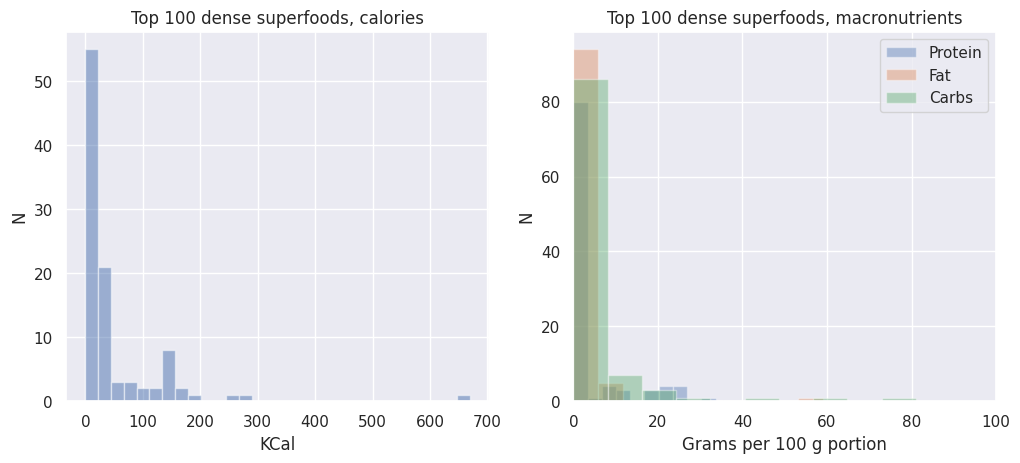

In [40]:
calories_macros_plots(dense_superfoods[:100], 'Top 100 dense superfoods')

# Выводы

Был проанализирован датасет с питательной ценностью почти 9 тысяч продуктов The Nutritional Content of Food. Были получены следующие результаты:
 - составлен список самых калорийных продуктов;
 - показано соотношение нутриентов в нескольких категориях продуктов;
 - составлен топ-3 самых богатых продуктов по всем нутриентам (45 шт);
 - составлен список продуктов, которые занимают лидерские места по нескольким микронутриентам;
 - составлен список продуктов, которые занимают лидерские места по нескольким микронутриентам в пересчёте на калорию.